In [356]:


from IDT_.idt_algo import IDT
from IDT_.ihmm_algo.ihmm import IHMM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 



In [357]:
testperson = 19

In [358]:
warnings.filterwarnings('ignore') 
gaze = pd.read_csv("../eye_tracking_expiriment\data\gaze_data_Tülin_19.csv")
gaze.head(10)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.280997,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Immersive
1,0.291209,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Immersive
2,0.300917,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Immersive
3,0.312930,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Immersive
4,0.324130,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Immersive
5,0.334646,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Immersive
6,0.345864,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Immersive
7,0.357389,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Immersive
8,0.368518,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Immersive
9,0.379743,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Immersive


In [359]:
gaze = gaze.dropna()
gaze.reset_index(drop=True, inplace=True)
gaze.shape

(155188, 39)

In [360]:
un = gaze["text_file"].unique()
un

array(['AI_HC_P08_text.txt', 'AI_HC_P08_MCQ.txt', 'AI_HC_P08_FIBQ.txt',
       'OR_HC_P08_text.txt', 'OR_HC_P08_MCQ.txt', 'OR_HC_P08_FIBQ.txt',
       'AI_SK_P08_text.txt', 'AI_SK_P08_MCQ.txt', 'AI_SK_P08_FIBQ.txt',
       'OR_SK_P08_text.txt', 'OR_SK_P08_MCQ.txt', 'OR_SK_P08_FIBQ.txt',
       'AI_KB_P08_text.txt', 'AI_KB_P08_MCQ.txt', 'AI_KB_P08_FIBQ.txt',
       'OR_KB_P08_text.txt', 'OR_KB_P08_MCQ.txt', 'OR_KB_P08_FIBQ.txt'],
      dtype=object)

In [361]:
im_HC_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[0])]
im_HC_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[3])]
im_SK_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[6])]
im_SK_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[9])]
im_KB_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[12])]
im_KB_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[15])]
im_HC_AI.reset_index(drop=True, inplace=True) 
im_HC_OR.reset_index(drop=True, inplace=True) 
im_SK_AI.reset_index(drop=True, inplace=True) 
im_SK_OR.reset_index(drop=True, inplace=True) 
im_KB_AI.reset_index(drop=True, inplace=True) 
im_KB_OR.reset_index(drop=True, inplace=True) 
im_HC_AI["device_time_stamp"] = im_HC_AI["device_time_stamp"] - im_HC_AI["device_time_stamp"][0]
im_HC_OR["device_time_stamp"] = im_HC_OR["device_time_stamp"] - im_HC_OR["device_time_stamp"][0]
im_SK_AI["device_time_stamp"] = im_SK_AI["device_time_stamp"] - im_SK_AI["device_time_stamp"][0]
im_SK_OR["device_time_stamp"] = im_SK_OR["device_time_stamp"] - im_SK_OR["device_time_stamp"][0]
im_KB_AI["device_time_stamp"] = im_KB_AI["device_time_stamp"] - im_KB_AI["device_time_stamp"][0]
im_KB_OR["device_time_stamp"] = im_KB_OR["device_time_stamp"] - im_KB_OR["device_time_stamp"][0]
im_SK_OR.head(5)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.000000,1,1,-51.320435,45.785717,608.617493,4.840737,44.316101,615.653381,0.622104,...,3.358765,3.083267,True,OR_SK_P08_text.txt,8.0,16.0,Arial,SK,False,Immersive
1,0.010976,1,1,-51.990746,46.037804,613.686279,4.840737,44.316101,615.653381,0.622672,...,3.377319,3.083267,True,OR_SK_P08_text.txt,8.0,16.0,Arial,SK,False,Immersive
2,0.044361,1,1,-54.091427,41.713985,614.034973,2.693003,41.245258,616.055054,0.627638,...,3.337509,3.041641,True,OR_SK_P08_text.txt,8.0,16.0,Arial,SK,False,Immersive
3,0.055302,1,1,-54.091427,41.713985,614.034973,2.693003,41.245258,616.055054,0.627638,...,3.337509,3.041641,True,OR_SK_P08_text.txt,8.0,16.0,Arial,SK,False,Immersive
4,0.067305,1,1,-54.918846,41.781494,614.051331,1.720580,41.410854,616.164673,0.629552,...,3.331299,3.030334,True,OR_SK_P08_text.txt,8.0,16.0,Arial,SK,False,Immersive


In [362]:
left_x = im_SK_OR['left_gaze_point_on_display_area_x']*2560
left_y = im_SK_OR['left_gaze_point_on_display_area_y']*1440
right_x = im_SK_OR['right_gaze_point_on_display_area_x']*2560
right_y = im_SK_OR['right_gaze_point_on_display_area_y']*1440
t = im_SK_OR['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,1144.297791,1037.133331,523.901939,487.670875
1,0.010976,1144.297791,1074.059982,523.901939,475.319924
2,0.044361,952.901382,962.946472,540.011072,512.864542
3,0.055302,952.901382,962.946472,540.011072,512.864542
4,0.067305,965.900116,982.382660,532.608519,509.503026
...,...,...,...,...,...
21493,319.485368,1433.260193,1484.100800,688.503013,672.919807
21494,319.496116,1429.489746,1483.952332,692.934537,674.281940
21495,319.507465,1450.567932,1508.791199,694.390054,672.501040
21496,319.518631,1523.494720,1559.772491,703.265162,678.025274


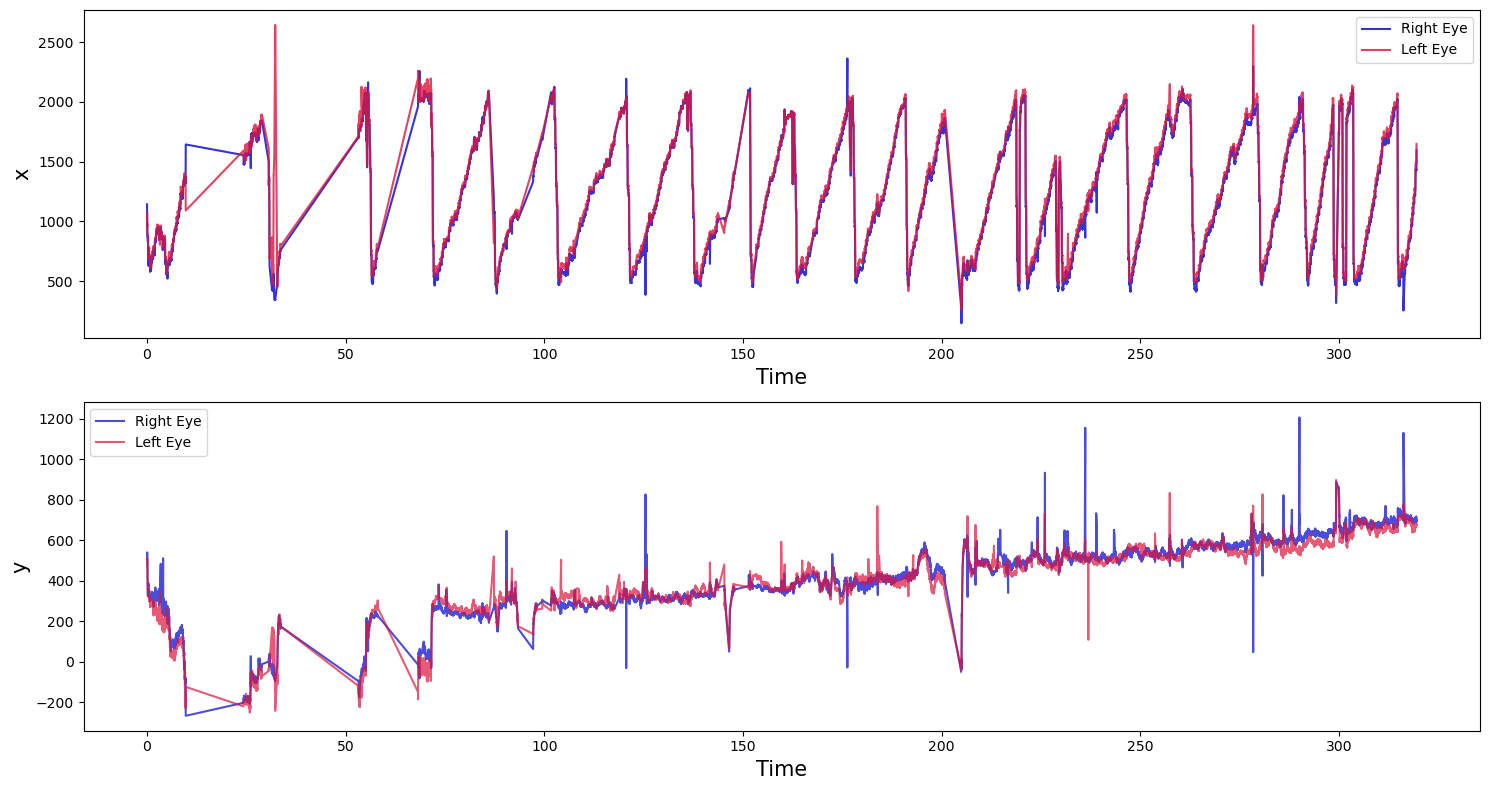

In [363]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()

In [364]:
last = gaze["Label"][0]
textfiles = [un[0], un[3],un[6] ,un[9] ,un[12], un[15]]
changes = []
skimming_parts = []
index = 0

for i, j in zip(gaze["Label"], gaze["text_file"]):
    if i != "Immersive" and j in textfiles:
        
        changes.append(gaze.loc[index])
        
    elif len(changes) > 0:
        
        skimming_parts.append(changes)
        changes = []
   
    index = index + 1


In [365]:
for i in range(len(skimming_parts)):
    skimming_parts[i] = pd.DataFrame(skimming_parts[i])
    skimming_parts[i].reset_index(drop=True, inplace=True)
    skimming_parts[i]["device_time_stamp"] = skimming_parts[i]["device_time_stamp"] - skimming_parts[i]["device_time_stamp"][0]
     

In [366]:
imerserive_parts = [im_HC_AI ,
im_HC_OR ,
im_SK_AI ,
im_SK_OR ,
im_KB_AI ,
im_KB_OR ]

In [367]:
part = 9
left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
t = skimming_parts[part]['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,1152.451172,1196.306152,-158.248819,-123.802507
1,0.010954,1156.638947,1196.306152,-148.414993,-123.802507
2,0.021926,1192.717133,1234.976196,-141.064260,-120.778745
3,0.032893,1194.807816,1241.783524,-128.559726,-104.825073
4,0.043862,1196.261826,1241.783524,-119.446771,-104.825073
...,...,...,...,...,...
640,10.247744,1766.710510,1831.681213,72.810447,-29.032879
641,10.258703,1766.710510,1835.616760,72.810447,-15.343598
642,10.270677,1764.228363,1833.915253,76.332884,-11.251620
643,10.280179,1764.228363,1833.915253,76.332884,-11.251620


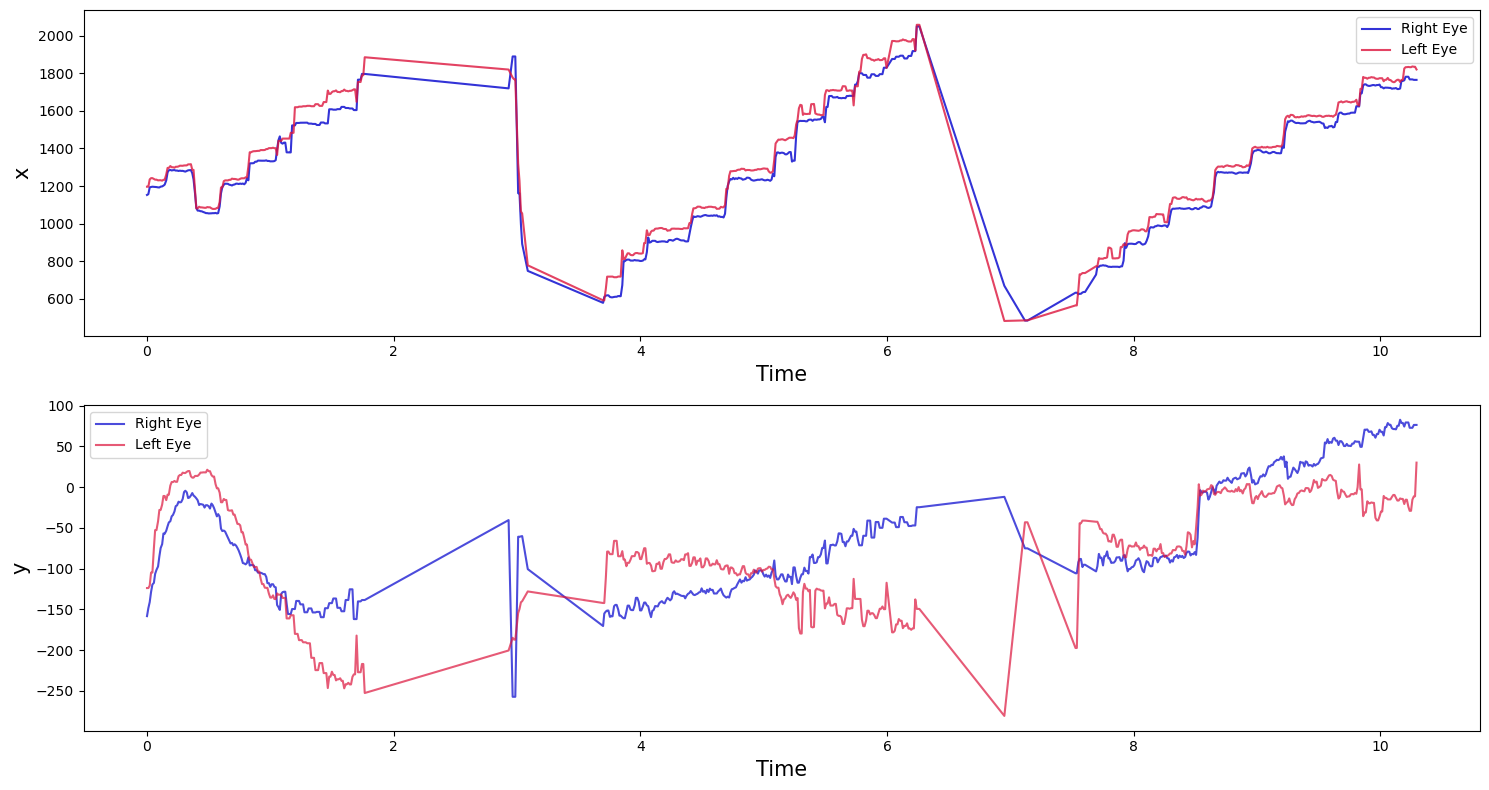

In [368]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()


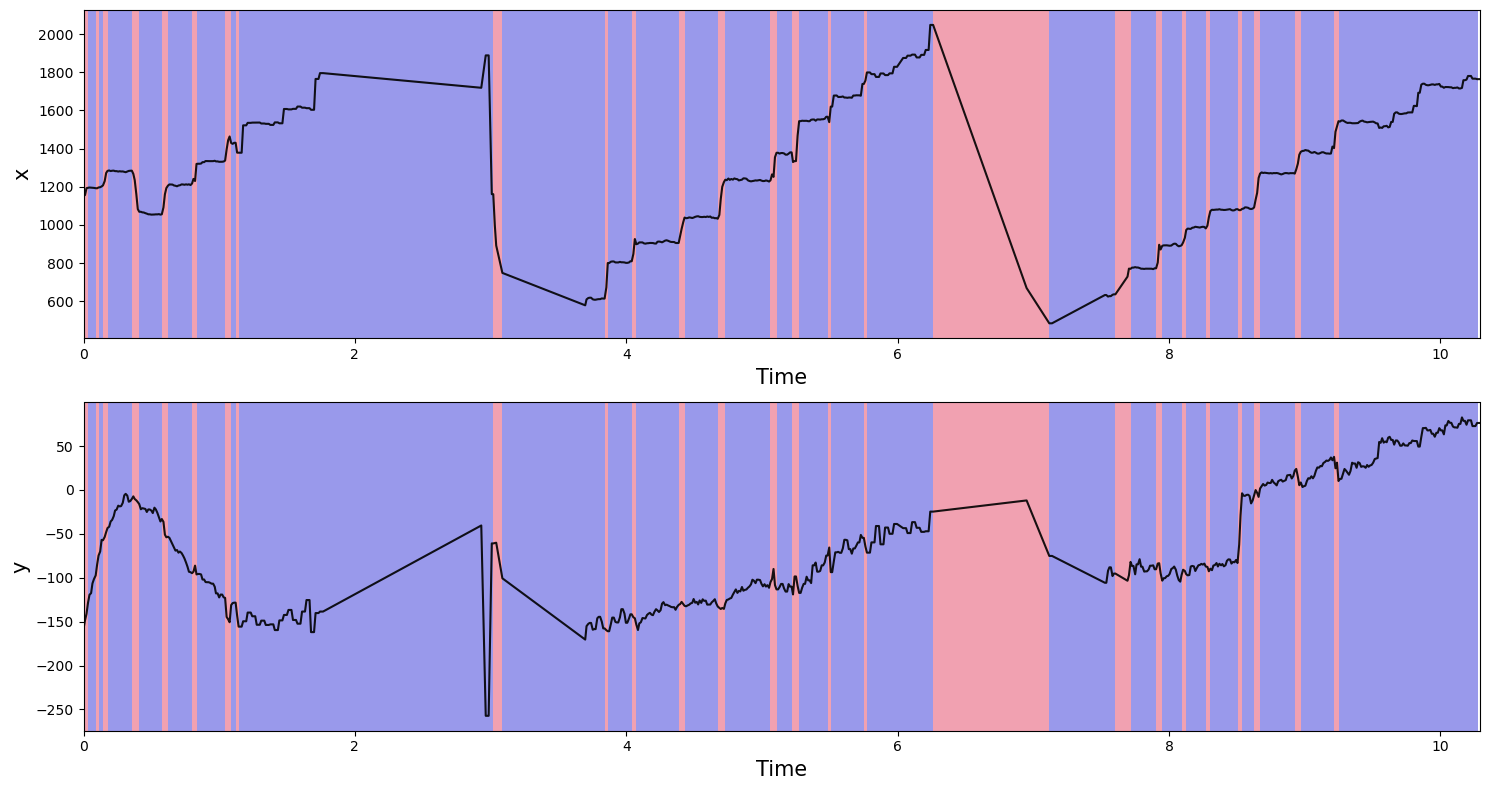

In [369]:
t = eyes['t']
x = eyes['x_right']
y = eyes['y_right']

classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
classifier.process()
classifier.plot()

In [370]:
skim_data = []
for i in range(len(skimming_parts)):
    part = i
    left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = skimming_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = skimming_parts[i].merge(fix, left_index=True, right_index=True)
    skim_data.append(round)


IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [371]:
skim_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-118.226349,103.244820,618.840149,-55.040512,108.142044,628.569580,0.772002,...,3.169037,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Skimming,1
1,0.010368,1,1,-118.233543,103.254555,619.046082,-55.034988,108.160522,628.720032,0.771929,...,3.171387,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Skimming,1
2,0.021362,1,1,-118.233543,103.254555,619.046082,-55.036297,108.180222,628.799011,0.771929,...,3.174484,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Skimming,1
3,0.033239,1,1,-118.247162,103.299736,619.213013,-55.034348,108.228676,628.940796,0.771887,...,3.174438,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Skimming,1
4,0.043375,1,1,-118.247971,103.367729,619.322815,-55.023949,108.289665,629.024780,0.771838,...,3.176468,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Skimming,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,5.830562,1,1,-107.380684,104.209183,614.885925,-43.148136,106.372704,623.161926,0.748559,...,3.021011,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Skimming,1
522,5.841310,1,1,-107.210823,104.175858,614.803772,-43.033298,106.328827,623.087036,0.748199,...,3.018860,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Skimming,1
523,5.851986,1,1,-107.210823,104.175858,614.803772,-42.968884,106.323380,623.084106,0.748199,...,3.020370,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Skimming,1
524,5.863991,1,1,-107.112236,104.220299,614.813904,-42.887718,106.344643,623.083252,0.747965,...,3.015045,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Skimming,1


In [372]:
im_data = []
for i in range(len(imerserive_parts)):
    part = i
    left_x = imerserive_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = imerserive_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = imerserive_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = imerserive_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = imerserive_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = imerserive_parts[i].merge(fix, left_index=True, right_index=True)
    im_data.append(round)

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [373]:
im_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-64.720940,63.345348,732.719238,0.924034,65.611877,734.176575,0.627558,...,3.425323,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Immersive,0
1,0.011627,1,1,-65.296944,63.744251,732.257751,0.660767,65.845459,734.197937,0.628744,...,3.431580,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Immersive,0
2,0.022297,1,1,-65.994576,64.186172,731.649414,0.468000,66.038406,734.104492,0.630192,...,3.441345,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Immersive,0
3,0.034026,1,1,-66.102028,64.245804,731.187378,0.094677,66.378189,733.651611,0.630480,...,3.463058,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Immersive,0
4,0.045017,1,1,-66.370743,64.358002,730.536682,-0.236256,66.647797,733.097595,0.631113,...,3.488266,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Immersive,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12781,171.049644,1,1,-64.040771,112.357880,636.790344,0.733351,109.769028,639.657837,0.642936,...,2.887863,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Immersive,1
12782,171.061111,1,1,-64.032913,112.330124,636.959045,0.739530,109.738625,639.796448,0.642883,...,2.895325,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Immersive,1
12783,171.071563,1,1,-64.029282,112.298576,637.131592,0.753825,109.693748,639.942627,0.642838,...,2.905960,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Immersive,1
12784,171.083173,1,1,-64.015236,112.268509,637.188110,0.777459,109.630875,640.029724,0.642795,...,2.906891,True,AI_HC_P08_text.txt,8.0,16.0,Arial,HC,False,Immersive,1


In [374]:
colunms_to_drop = ['Reading', 'text_file', 'passage_index', 'AI', 'Label']
for i in range(len(im_data)):
    im_data[i] = im_data[i].drop(columns = colunms_to_drop)
for i in range(len(skim_data)):
    skim_data[i] = skim_data[i].drop(columns = colunms_to_drop)

In [375]:
y_label = []
x_data = []
for i in range(len(im_data)):
    y_label.append("immersive")
    x_data.append(im_data[i])
for i in range(len(skim_data)):
    y_label.append("skimming")
    x_data.append(skim_data[i])

In [376]:
com_DF = pd.concat(x_data, ignore_index=True)

com_DF.to_csv(f'x_data_{testperson}.csv', index = False)
np.savetxt(f'y_label_{testperson}.csv', y_label, fmt='%s', delimiter=",")